## Compare the performance of the scikit and the custom decision tree regressors

Tested on the scikit Diabetes toy dataset.

## Import of the dataset

In [19]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

data = load_diabetes()
x = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = y.iloc[:,0]

print(x.head())
print(y[:5])


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: 0, dtype: float64


## Split the dataset into training and testing sets

In [20]:
#split the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Comparison of the performance of the tree regressors
### 1) Compare on predefined parameters

In [21]:
from sklearn.tree import DecisionTreeRegressor
from algorithms.tree import CustomDecisionTreeRegressor
from sklearn.metrics import r2_score

print("Tree Regressor Comparison for overfit parameters")
print("------------------------------------------------------")

# Default tree (no specified parameters)
scikit_model = DecisionTreeRegressor(max_depth=100, random_state=42)
scikit_model.fit(x_train, y_train)
scikit_score = scikit_model.score(x_test, y_test)
print("Scikit-learn model accuracy on test data:        ", "{:.2f}".format(scikit_score))
scikit_train_score = scikit_model.score(x_train, y_train)
print("Scikit-learn model accuracy on training data:    ", "{:.2f}".format(scikit_train_score))

# Custom tree (no specified parameters)
custom_model = CustomDecisionTreeRegressor(max_depth=100)
custom_model.fit(x_train, y_train)
custom_score = custom_model.score(x_test, y_test)
print("Custom model accuracy on test data:              ", "{:.2f}".format(custom_score))
custom_train_score = custom_model.score(x_train, y_train)
print("Custom model accuracy on training data:          ", "{:.2f}".format(custom_train_score))


Tree Regressor Comparison for overfit parameters
------------------------------------------------------
Scikit-learn model accuracy on test data:         0.06
Scikit-learn model accuracy on training data:     1.00
Custom model accuracy on test data:               -0.05
Custom model accuracy on training data:           1.00


In [36]:
print("Tree Regressor Comparison for random parameters")
print("------------------------------------------------------")
print("max_depth=2, min_samples_split=3, min_samples_leaf=4")
print("------------------------------------------------------")

# Default tree (specified parameters)
scikit_model = DecisionTreeRegressor(max_depth=2, min_samples_split=3, min_samples_leaf=4, random_state=42)
scikit_model.fit(x_train, y_train)
scikit_score = scikit_model.score(x_test, y_test)
print("Scikit-learn model accuracy on test data:        ", "{:.2f}".format(scikit_score))
scikit_train_score = scikit_model.score(x_train, y_train)
print("Scikit-learn model accuracy on training data:    ", "{:.2f}".format(scikit_train_score))

# Custom tree (specified parameters)
custom_model = CustomDecisionTreeRegressor(max_depth=2, min_samples_split=3, min_samples_leaf=4)
custom_model.fit(x_train, y_train)
custom_score = custom_model.score(x_test, y_test)
print("Custom model accuracy on test data:              ", "{:.2f}".format(custom_score))
custom_train_score = custom_model.score(x_train, y_train)
print("Custom model accuracy on training data:          ", "{:.2f}".format(custom_train_score))


Tree Regressor Comparison for random parameters
------------------------------------------------------
max_depth=2, min_samples_split=3, min_samples_leaf=4
------------------------------------------------------
Scikit-learn model accuracy on test data:         0.29
Scikit-learn model accuracy on training data:     0.45
Custom model accuracy on test data:               0.27
Custom model accuracy on training data:           0.45


### 2) Compare on the best parameters obtained by hyperparameter tuning

#### Hyperparameter space

In [23]:
params = dict()
# max depth list from 1 to 20
params['max_depth'] = list(range(1, 32, 2))
params['min_samples_split'] = list(range(2, 31, 2))
params['min_samples_leaf'] = list(range(1, 32, 2))
print(params)

{'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}


#### K-Fold Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True)

#### Initialize Optimizer

In [25]:
from sklearn.model_selection import GridSearchCV
from algorithms.fast_parameter_search import MyGridSearchCV

scikit_clf = DecisionTreeRegressor(random_state=42)
# add random state to make the results reproducible
scikit_params = params.copy()
scikit_params['random_state'] = [42]
scikit_search = GridSearchCV(estimator=scikit_clf, param_grid=scikit_params, cv=cv, scoring='r2', verbose=0, n_jobs=-1)

custom_clf = CustomDecisionTreeRegressor()

custom_search = MyGridSearchCV(custom_clf, params, cv=cv, n_jobs=-1)

#### Results

In [26]:
#Scikit Learn Decision Tree
scikit_search.fit(x_train, y_train)
print("Scikit Learn Decision Tree")
print("Best score", scikit_search.best_score_)
print("Best parameters", scikit_search.best_params_)

# Custom Decision Tree
custom_search.fit(x_train, y_train)
print("Custom Decision Tree")
print("Best score", custom_search.best_score)
print("Best parameters", custom_search.best_params)

Scikit Learn Decision Tree
Best score 0.371505164170404
Best parameters {'max_depth': 3, 'min_samples_leaf': 21, 'min_samples_split': 2, 'random_state': 42}
Custom Decision Tree
Best score 0.433015949212667
Best parameters {'max_depth': 27, 'min_samples_split': 12, 'min_samples_leaf': 23}


In [30]:
best_scikit_model = scikit_search.best_estimator_
best_scikit_model.fit(x_train, y_train)
y_pred_scikit = best_scikit_model.predict(x_test)
scikit_accuracy = r2_score(y_test, y_pred_scikit)

best_custom_model = custom_search.best_estimator
best_custom_model.fit(x_train, y_train)
y_pred_custom = best_custom_model.predict(x_test)
custom_accuracy = r2_score(y_test, y_pred_custom)

print("Tree Regressor Comparison for best parameters")
print("------------------------------------------------------")
print("Scikit-learn model r2 score on test data:        ", "{:.2f}".format(scikit_accuracy))
print("Custom model r2 score on test data:              ", "{:.2f}".format(custom_accuracy))



Tree Regressor Comparison for best parameters
------------------------------------------------------
Scikit-learn model r2 score on test data:         0.39
Custom model r2 score on test data:               0.41


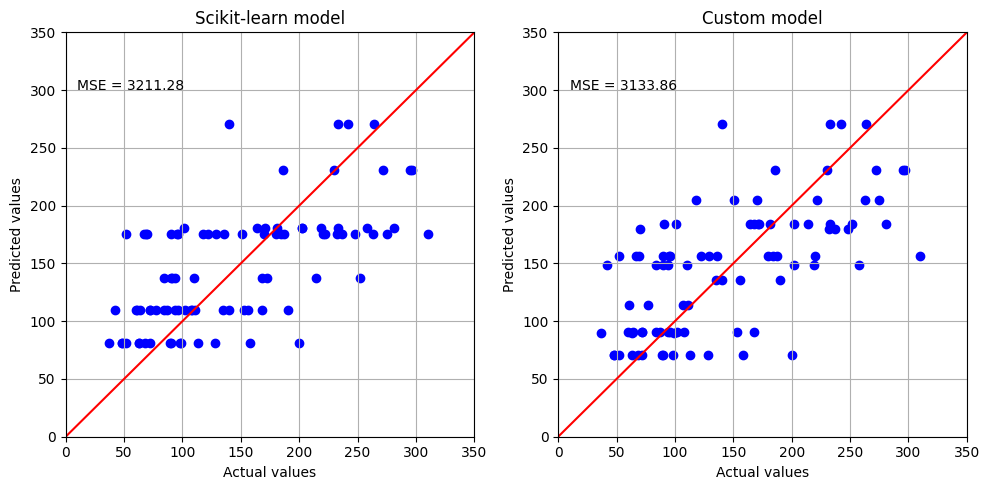

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error  

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_scikit, color='blue')
plt.title('Scikit-learn model')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([0, 350], [0, 350], color='red')
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.text(10, 300, 'MSE = ' + str("{:.2f}".format(mean_squared_error(y_test, y_pred_scikit))))
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_custom, color='blue')
plt.title('Custom model')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([0, 350], [0, 350], color='red')
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.text(10, 300, 'MSE = ' + str("{:.2f}".format(mean_squared_error(y_test, y_pred_custom))))
plt.grid()

plt.tight_layout()

plt.show()

